# SPACEc:Distance permutation analysis

## Set up environment

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# silencing warnings
import warnings
warnings.filterwarnings('ignore')

#import standard packages
import pathlib
import pandas as pd
import scanpy as sc

In [3]:
import spacec as sp

2024-01-18 08:42:33.083259: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mgbckr/miniconda3/envs/yuqi-spacodex/lib/python3.10/site-packages/cv2/../../lib64:
2024-01-18 08:42:33.083285: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
root_path = pathlib.Path("..")

data_path = root_path / 'data' # where the data is stored

# where you want to store the output
output_dir = root_path / '_out'
output_dir.mkdir(exist_ok=True, parents=True)

In [5]:
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [6]:
# Load data
adata = sc.read(output_dir / "adata_nn_demo_annotated_cn.h5ad")
adata

AnnData object with n_obs × n_vars = 49548 × 58
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'region', 'unique_region', 'condition', 'leiden_0.4', 'leiden_0.4_subcluster_0', 'leiden_0.4_subcluster_3', 'leiden_0.4_subcluster_4', 'celltype', 'leiden_0.4_subcluster_2', 'leiden_0.4_subcluster_11', 'leiden_0.4_subcluster_0sub', 'celltype_fine', 'CN_k20_n6', 'CN_k20_n6_annot'
    uns: 'Centroid_k20_n6', 'celltype_fine_colors', 'dendrogram_leiden_0.4', 'dendrogram_leiden_0.4_subcluster_4', 'leiden', 'leiden_0.4_colors', 'leiden_0.4_subcluster_0sub_colors', 'leiden_0.4_subcluster_4_colors', 'neighbors', 'umap', 'unique_region_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

## 5.1 Identify potential interactions

In [7]:
distance_pvals = sp.tl.identify_interactions_ad(
    adata = adata, 
    id = "index", 
    x_pos = "x", 
    y_pos = "y", 
    cell_type = "celltype", 
    region = "unique_region",
    num_iterations=100,
    num_cores=10, 
    min_observed = 10,
    comparison = 'condition')
distance_pvals.head()

Computing for observed distances between cell types!
This function expects integer values for xy coordinates.
x and y will be changed to integer. Please check the generated output!


2024-01-18 08:42:42.315519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mgbckr/miniconda3/envs/yuqi-spacodex/lib/python3.10/site-packages/cv2/../../lib64:/home/mgbckr/miniconda3/envs/yuqi-spacodex/lib/python3.10/site-packages/cv2/../../lib64:
2024-01-18 08:42:42.315544: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-18 08:42:42.549319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mgbckr/miniconda3/envs/yuqi-spacodex/lib/python3.10/site-packages/cv2/../../lib64:/home/mgbckr/miniconda3/envs/yuqi-spacodex/lib/python3.10/site-packages/cv2/../..

Save triangulation distances output to anndata.uns triDist
Permuting data labels to obtain the randomly distributed distances!
this step can take awhile


2024-01-18 08:43:20.633048: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mgbckr/miniconda3/envs/yuqi-spacodex/lib/python3.10/site-packages/cv2/../../lib64:/home/mgbckr/miniconda3/envs/yuqi-spacodex/lib/python3.10/site-packages/cv2/../../lib64:
2024-01-18 08:43:20.633084: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-18 08:43:20.780037: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mgbckr/miniconda3/envs/yuqi-spacodex/lib/python3.10/site-packages/cv2/../../lib64:/home/mgbckr/miniconda3/envs/yuqi-spacodex/lib/python3.10/site-packages/cv2/../..

Save iterative triangulation distance output to anndata.uns triDist


,celltype1,celltype2,condition,expected,expected_mean,keep_x,observed,observed_mean,keep_y,pvalue,logfold_group,interaction
0,B,B,tonsil,"[17.76495590313308, 18.051606445356498, 17.931...",17.964712,True,"[20.304023798186922, 15.826583029393122, 15.29...",16.987981,True,1.398307e-09,-0.080651,B --> B
1,B,B,tonsillitis,"[17.318173734946573, 17.348225716752772, 16.89...",17.243278,True,"[17.60116347339783, 12.649110640673518, 13.220...",16.243572,True,2.010547e-10,-0.086165,B --> B
2,B,CD4T,tonsil,"[18.157294467602387, 17.94009366259049, 18.240...",17.995344,True,"[15.0, 12.36931687685298, 20.635008228668667, ...",17.297289,True,4.752424e-05,-0.057078,B --> CD4T
3,B,CD4T,tonsillitis,"[16.816655395233113, 17.87570294255835, 17.228...",17.154461,True,"[10.523582248299318, 23.021728866442675, 12.08...",16.378830,True,7.089613e-08,-0.066752,B --> CD4T
4,B,CD8T,tonsil,"[18.52886281180136, 19.819081588856097, 17.377...",18.019744,True,"[15.245757881000944, 11.180339887498949, 12.80...",16.840193,True,1.676435e-07,-0.097670,B --> CD8T


In [8]:
# Identify significant cell-cell interactions
# dist_table_filt is a simplified table used for plotting
# dist_data_filt contains the filtered raw data with more information about the pairs
dist_table_filt, dist_data_filt = sp.tl.tl_filter_interactions(
    distance_pvals = distance_pvals,
    pvalue = 0.05,
    logfold_group_abs = 0.1)

print(dist_table_filt.shape)
dist_data_filt.head()

(34, 2)


,celltype1,celltype2,condition,expected,expected_mean,keep_x,observed,observed_mean,keep_y,pvalue,logfold_group,interaction,logfold_group_abs,pairs
2,B,CD4T,tonsil,"[18.157294467602387, 17.94009366259049, 18.240...",17.995344,True,"[15.0, 12.36931687685298, 20.635008228668667, ...",17.297289,True,4.752424e-05,-0.057078,B --> CD4T,0.057078,B_CD4T
3,B,CD4T,tonsillitis,"[16.816655395233113, 17.87570294255835, 17.228...",17.154461,True,"[10.523582248299318, 23.021728866442675, 12.08...",16.378830,True,7.089613e-08,-0.066752,B --> CD4T,0.066752,B_CD4T
4,B,CD8T,tonsil,"[18.52886281180136, 19.819081588856097, 17.377...",18.019744,True,"[15.245757881000944, 11.180339887498949, 12.80...",16.840193,True,1.676435e-07,-0.097670,B --> CD8T,0.097670,B_CD8T
5,B,CD8T,tonsillitis,"[15.862762402227556, 16.672094265180622, 16.10...",17.545528,True,"[20.0, 21.095023109728988, 13.038404810405298,...",15.455944,True,6.608855e-03,-0.182942,B --> CD8T,0.182942,B_CD8T
6,B,DC,tonsil,"[18.019664770856167, 17.383583118170794, 18.32...",18.076584,True,"[22.932551148899137, 13.648529270389178, 14.23...",16.894161,True,1.242533e-08,-0.097597,B --> DC,0.097597,B_DC


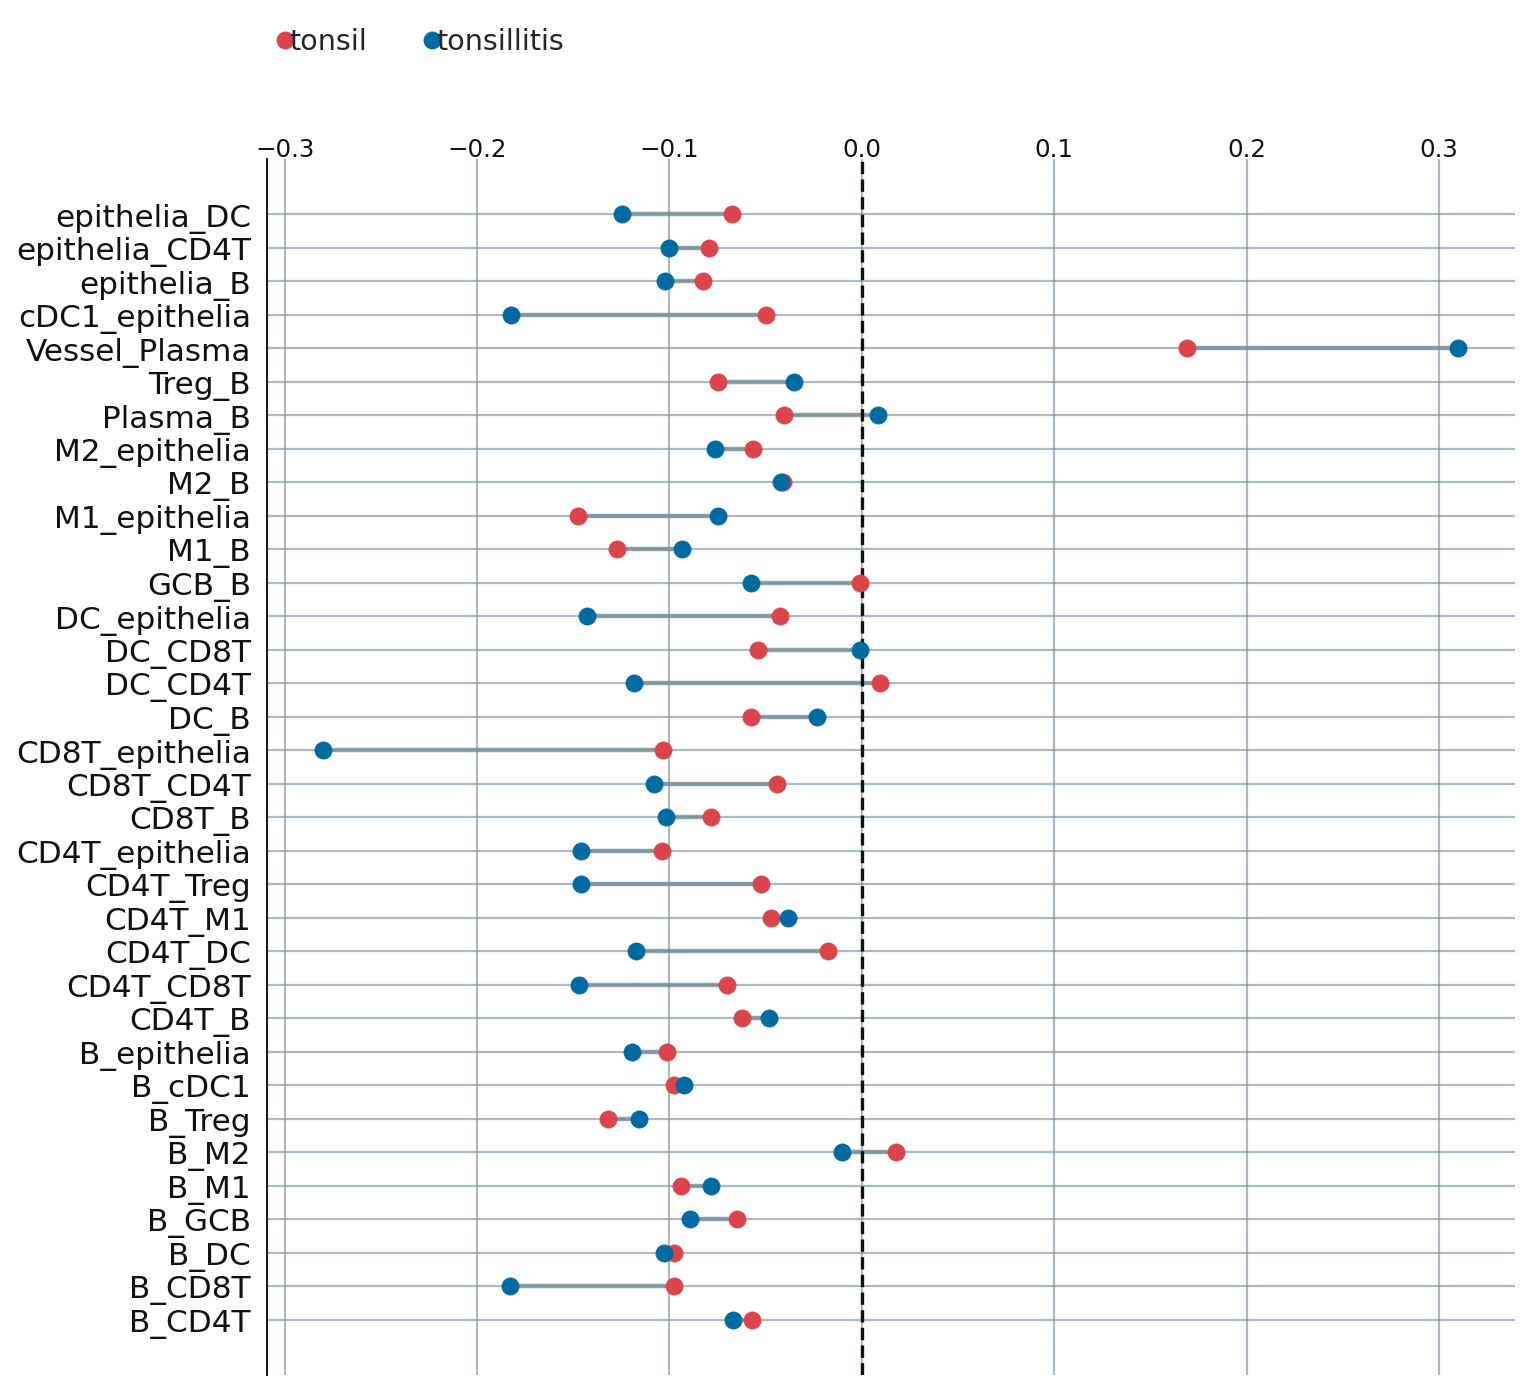

In [10]:
sp.pl.dumbbell(data = dist_table_filt, figsize=(10,10), colors = ['#DB444B', '#006BA2'])